In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.models import Sequential
import glob
import cv2

In [10]:
train_files=glob.glob("D:/trainn/*/**")

In [11]:
len(train_files)

1085

In [12]:
train_files

['D:/trainn\\without_mask\\download (1).jpg',
 'D:/trainn\\without_mask\\download (2).jpg',
 'D:/trainn\\without_mask\\download (3).jpg',
 'D:/trainn\\without_mask\\download.jpg',
 'D:/trainn\\without_mask\\faviconV2.png',
 'D:/trainn\\without_mask\\istockphoto-1014480196-612x612.jpg',
 'D:/trainn\\without_mask\\istockphoto-1015320256-612x612.jpg',
 'D:/trainn\\without_mask\\istockphoto-1053541278-612x612.jpg',
 'D:/trainn\\without_mask\\istockphoto-1061848164-612x612.jpg',
 'D:/trainn\\without_mask\\istockphoto-1065043890-612x612.jpg',
 'D:/trainn\\without_mask\\istockphoto-1073707746-612x612.jpg',
 'D:/trainn\\without_mask\\istockphoto-108222721-612x612.jpg',
 'D:/trainn\\without_mask\\istockphoto-108267695-612x612.jpg',
 'D:/trainn\\without_mask\\istockphoto-108270618-612x612.jpg',
 'D:/trainn\\without_mask\\istockphoto-108365104-612x612.jpg',
 'D:/trainn\\without_mask\\istockphoto-1086025344-612x612.jpg',
 'D:/trainn\\without_mask\\istockphoto-1128241252-612x612.jpg',
 'D:/trainn\\

In [13]:
from random import shuffle
shuffle(train_files)
train_files

['D:/trainn\\without_mask\\istockphoto-1333898987-612x612.jpg',
 'D:/trainn\\without_mask\\istockphoto-532528585-612x612.jpg',
 'D:/trainn\\with_mask\\maksssksksss522.png',
 'D:/trainn\\with_mask\\maksssksksss702.png',
 'D:/trainn\\with_mask\\maksssksksss841.png',
 'D:/trainn\\with_mask\\maksssksksss406.png',
 'D:/trainn\\with_mask\\maksssksksss778.png',
 'D:/trainn\\with_mask\\maksssksksss18.png',
 'D:/trainn\\with_mask\\maksssksksss218.png',
 'D:/trainn\\with_mask\\maksssksksss143.png',
 'D:/trainn\\with_mask\\maksssksksss813.png',
 'D:/trainn\\without_mask\\istockphoto-494121213-612x612.jpg',
 'D:/trainn\\with_mask\\maksssksksss455.png',
 'D:/trainn\\with_mask\\maksssksksss728.png',
 'D:/trainn\\with_mask\\maksssksksss407.png',
 'D:/trainn\\without_mask\\istockphoto-1278631117-612x612.jpg',
 'D:/trainn\\without_mask\\istockphoto-172669736-612x612.jpg',
 'D:/trainn\\with_mask\\maksssksksss60.png',
 'D:/trainn\\with_mask\\maksssksksss51.png',
 'D:/trainn\\with_mask\\maksssksksss739.pn

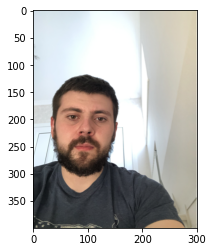

In [14]:
from PIL import Image
img=Image.open(train_files[20])
plt.imshow(img)

In [15]:
np.array(img).shape

(400, 301, 4)

In [16]:
grey_scale=[]
resized_files=[]
i=0;

In [18]:
for items in train_files:
    img=Image.open(items).convert('L')
    img.save('greyscale.jpeg')
    grey_scale.append(img)
    img=grey_scale[i].resize((128,128))
    resized_files.append(img)
    i=i+1

In [19]:
np.array(resized_files[1000]).shape

(128, 128)

In [20]:
rgb_files=[]

In [21]:
for i,fi in enumerate(resized_files):
    img= cv2.cvtColor(np.array(fi),cv2.COLOR_GRAY2RGB)
    rgb_files.append(img)

In [22]:
len(rgb_files)

2170

In [23]:
rgb_files[0].shape

(128, 128, 3)

In [24]:
np.array(rgb_files[1]).shape

(128, 128, 3)

In [28]:
X_train=np.zeros((len(rgb_files),128,128,3))
Y_train=np.zeros((len(train_files),1))
for i,fi in enumerate(rgb_files):
    #fi_array=np.array(fi)
    if(fi.shape[0]==128 and fi.shape[1]==128):
        X_train[i,:,:,:]=fi
        
for i, fis in enumerate(train_files):
    if "without_mask" in fis:
        Y_train[i]=  0
    elif "with_mask" in fis:
        Y_train[i]= 1

In [29]:
X_train

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [30]:
Y_train

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [31]:
X_train/255.0

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [32]:
model=Sequential()
model_part1=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(128,128,3),
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)

58889256/58889256 [==============================] - 5s 0us/step


In [33]:
for layer in model_part1.layers:
    layer.trainable=False

In [70]:
model.add(model_part1)

In [34]:
from keras.layers import Flatten,Dense
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [35]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate= 1e-3),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [75]:
model.fit(X_train, Y_train,epochs=3,validation_split=0.1)

Epoch 1/3
282/282 [==============================] - 297s 1s/step - loss: 0.1076 - accuracy: 0.9870 - val_loss: 0.0710 - val_accuracy: 0.9940
Epoch 2/3
282/282 [==============================] - 298s 1s/step - loss: 0.0267 - accuracy: 0.9969 - val_loss: 0.0376 - val_accuracy: 0.9940
Epoch 3/3
282/282 [==============================] - 295s 1s/step - loss: 0.0084 - accuracy: 0.9980 - val_loss: 0.0253 - val_accuracy: 0.9930


In [37]:
test_files=glob.glob("D:/trainn/*/**")

In [38]:
len(test_files)

1085

In [39]:
from random import shuffle
shuffle(test_files)
test_files

['D:/trainn\\with_mask\\maksssksksss200.png',
 'D:/trainn\\with_mask\\maksssksksss765.png',
 'D:/trainn\\with_mask\\maksssksksss126.png',
 'D:/trainn\\with_mask\\maksssksksss848.png',
 'D:/trainn\\without_mask\\istockphoto-1338006633-612x612.jpg',
 'D:/trainn\\with_mask\\maksssksksss349.png',
 'D:/trainn\\with_mask\\maksssksksss174.png',
 'D:/trainn\\with_mask\\maksssksksss665.png',
 'D:/trainn\\with_mask\\maksssksksss714.png',
 'D:/trainn\\with_mask\\maksssksksss657.png',
 'D:/trainn\\with_mask\\maksssksksss659.png',
 'D:/trainn\\without_mask\\istockphoto-1065043890-612x612.jpg',
 'D:/trainn\\without_mask\\istockphoto-1196523663-612x612.jpg',
 'D:/trainn\\with_mask\\maksssksksss779.png',
 'D:/trainn\\without_mask\\istockphoto-883271290-612x612.jpg',
 'D:/trainn\\with_mask\\maksssksksss15.png',
 'D:/trainn\\with_mask\\maksssksksss734.png',
 'D:/trainn\\with_mask\\maksssksksss19.png',
 'D:/trainn\\with_mask\\maksssksksss597.png',
 'D:/trainn\\with_mask\\maksssksksss87.png',
 'D:/trainn\

In [41]:
grey_scale_test=[]
resized_files_test=[]
i=0;

In [42]:
for items in test_files:
    img=Image.open(items).convert('L')
    img.save('greyscale.jpeg')
    grey_scale_test.append(img)
    img=grey_scale_test[i].resize((128,128))
    resized_files_test.append(img)
    i=i+1

In [94]:
rgb_files_test=[]

In [95]:
for i,fi in enumerate(resized_files_test):
    img= cv2.cvtColor(np.array(fi),cv2.COLOR_GRAY2RGB)
    rgb_files_test.append(img)

In [96]:
len(rgb_files_test)

992

In [97]:
np.array(rgb_files_test[0]).shape

(128, 128, 3)

In [98]:
X_test=np.zeros((len(rgb_files_test),128,128,3))
Y_test=np.zeros((len(test_files),1))
for i,fi in enumerate(rgb_files_test):
    #fi_array=np.array(fi)
    if(fi.shape[0]==128 and fi.shape[1]==128):
        X_test[i,:,:,:]=fi
        
for i, fis in enumerate(test_files):
    if "without_mask" in fis:
        Y_test[i]=  0
    elif "with_mask" in fis:
        Y_test[i]= 1

In [99]:
X_test

array([[[[ 11.,  11.,  11.],
         [ 17.,  17.,  17.],
         [ 17.,  17.,  17.],
         ...,
         [ 47.,  47.,  47.],
         [ 46.,  46.,  46.],
         [ 28.,  28.,  28.]],

        [[ 11.,  11.,  11.],
         [ 15.,  15.,  15.],
         [ 15.,  15.,  15.],
         ...,
         [ 41.,  41.,  41.],
         [ 44.,  44.,  44.],
         [ 37.,  37.,  37.]],

        [[ 14.,  14.,  14.],
         [ 17.,  17.,  17.],
         [ 17.,  17.,  17.],
         ...,
         [ 32.,  32.,  32.],
         [ 37.,  37.,  37.],
         [ 47.,  47.,  47.]],

        ...,

        [[  9.,   9.,   9.],
         [  8.,   8.,   8.],
         [  7.,   7.,   7.],
         ...,
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.]],

        [[  9.,   9.,   9.],
         [  8.,   8.,   8.],
         [  7.,   7.,   7.],
         ...,
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.]],

        [[  8.,   8.,   8.],
       

In [100]:
X_test/255.0

array([[[[0.04313725, 0.04313725, 0.04313725],
         [0.06666667, 0.06666667, 0.06666667],
         [0.06666667, 0.06666667, 0.06666667],
         ...,
         [0.18431373, 0.18431373, 0.18431373],
         [0.18039216, 0.18039216, 0.18039216],
         [0.10980392, 0.10980392, 0.10980392]],

        [[0.04313725, 0.04313725, 0.04313725],
         [0.05882353, 0.05882353, 0.05882353],
         [0.05882353, 0.05882353, 0.05882353],
         ...,
         [0.16078431, 0.16078431, 0.16078431],
         [0.17254902, 0.17254902, 0.17254902],
         [0.14509804, 0.14509804, 0.14509804]],

        [[0.05490196, 0.05490196, 0.05490196],
         [0.06666667, 0.06666667, 0.06666667],
         [0.06666667, 0.06666667, 0.06666667],
         ...,
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.14509804, 0.14509804, 0.14509804],
         [0.18431373, 0.18431373, 0.18431373]],

        ...,

        [[0.03529412, 0.03529412, 0.03529412],
         [0.03137255, 0.03137255, 0.03137255]

In [101]:
Y_test

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [102]:
model.predict(X_test)

31/31 [==============================] - 28s 822ms/step


array([[1.0000000e+00, 2.6189164e-23],
       [1.6101478e-30, 1.0000000e+00],
       [1.0000000e+00, 6.6289063e-18],
       ...,
       [1.0000000e+00, 1.1303574e-26],
       [2.9663113e-21, 1.0000000e+00],
       [1.1309978e-30, 1.0000000e+00]], dtype=float32)

In [ ]:
model.evaluate(X_test, Y_test, batch_size=128)

6/8 [=====================>........] - ETA: 7s - loss: 0.0973 - accuracy: 0.9922 